In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

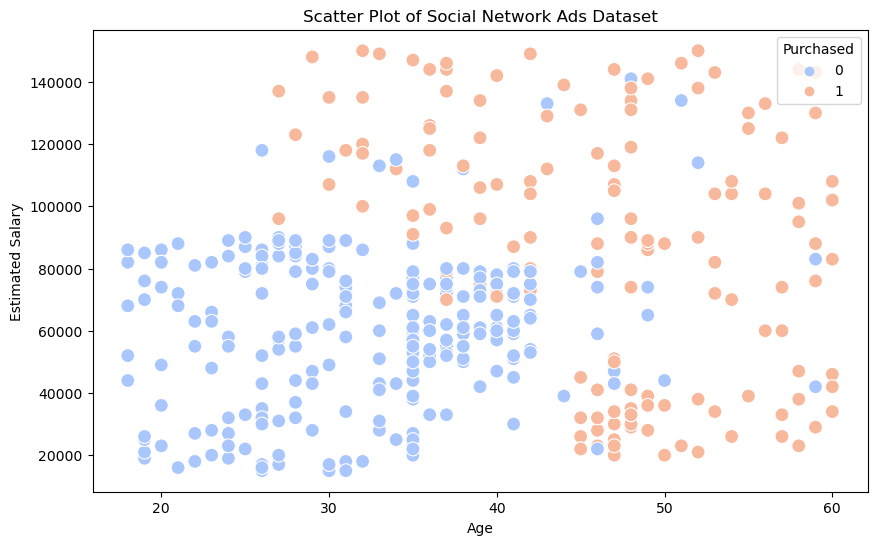

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, palette='coolwarm', s=100)
plt.title('Scatter Plot of Social Network Ads Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', loc='upper right')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

ada_model = AdaBoostClassifier(n_estimators=150,learning_rate=0.1,random_state=42)

np.mean(cross_val_score(ada_model,X,y,scoring='accuracy',cv=10))

0.8949999999999999

In [9]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150, random_state=42)

In [10]:
y_pred = ada_model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


Confusion Matrix:
[[61  2]
 [ 8 29]]


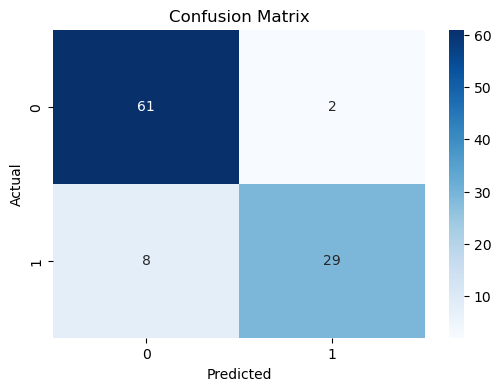

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

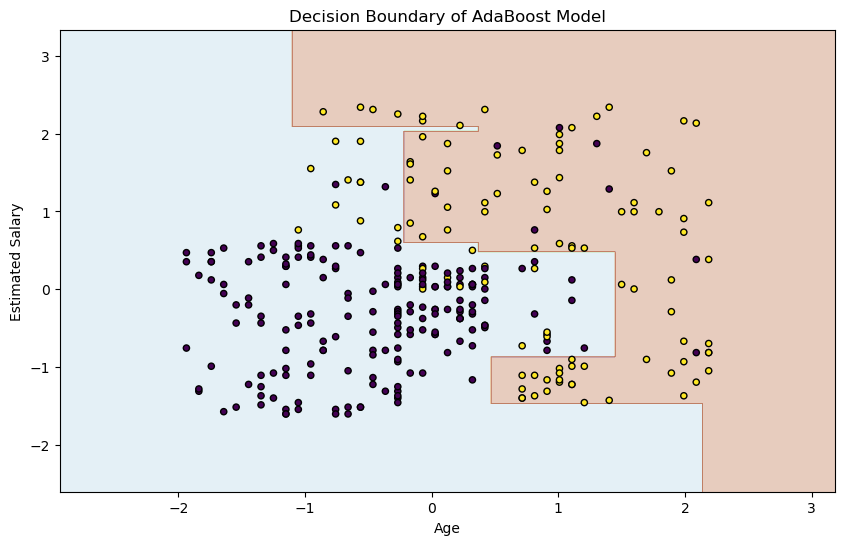

In [13]:
# Visualize the decision boundary
# Create a mesh grid based on the range of the features
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the function value for the whole grid
Z = ada_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Boundary of AdaBoost Model')
plt.show()

## Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

grid = {
        'n_estimators' : [10, 50, 100, 500],
        'learning_rate' : [0.0001,0.001,0.01,0.1,1.0],
        'algorithm': ['SAMME','SAMME.R']
}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid, n_jobs=-1,cv=10,scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)


In [53]:
grid_result.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 100}

In [54]:
grid_result.best_score_

0.8866666666666667